## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [2]:
# Get a list of all columns for easy reference
mouse_metadata.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'], dtype='object')

In [3]:
# Get a list of all columns for easy reference
study_results.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'], dtype='object')

In [4]:
# Combine the data into a single dataset
combined_df=pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice.
len(combined_df["Mouse ID"].value_counts())

249

In [6]:
combined_df["Mouse ID"].value_counts()

g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#group_by_ID=combined_df.groupby(["Mouse ID"])
duplicate_mice=combined_df.loc[combined_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice=combined_df.loc[combined_df["Mouse ID"]=="g989",:]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
change_index=combined_df.set_index("Mouse ID")
change_index


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2
z969,Naftisol,Male,9,30,30,65.841013,3
z969,Naftisol,Male,9,30,35,69.176246,4


In [10]:
clean_df=change_index.drop(index='g989')
clean_df.head()

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1


In [11]:
# Checking the number of mice in the clean DataFrame.
clean_reset_df=clean_df.reset_index()
len(clean_reset_df["Mouse ID"].value_counts())

248

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

group_by_drug=clean_reset_df.groupby(['Drug Regimen'])


In [13]:
mean_of_drug=group_by_drug["Tumor Volume (mm3)"].mean()
median_of_drug=group_by_drug["Tumor Volume (mm3)"].median()
variance_of_drug=group_by_drug["Tumor Volume (mm3)"].var()
sd_of_drug=group_by_drug["Tumor Volume (mm3)"].std()
sem_of_drug=group_by_drug["Tumor Volume (mm3)"].sem()

summary_stats=pd.DataFrame({"Mean-Tumor Volume (mm3)":mean_of_drug,
                             "Median-Tumor Volume (mm3)": median_of_drug,
                             "Variance-Tumor Volume (mm3)":variance_of_drug,
                             "St Dev-Tumor Volume (mm3)": sd_of_drug,
                            "SEM-Tumor Volume (mm3)": sem_of_drug
                              })
summary_stats

,Mean-Tumor Volume (mm3),Median-Tumor Volume (mm3),Variance-Tumor Volume (mm3),St Dev-Tumor Volume (mm3),SEM-Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_2=clean_reset_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])
summary_stats_2


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

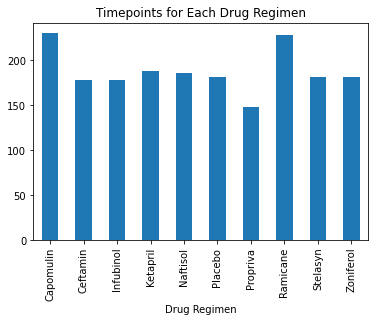

In [15]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

bar_plot=clean_reset_df.groupby(["Drug Regimen"])["Timepoint"].count()
bar_plot.plot(kind="bar")
plt.title("Timepoints for Each Drug Regimen")
plt.show()

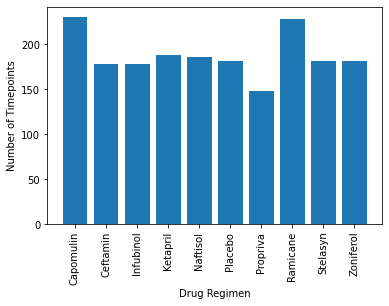

In [16]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(bar_plot.index, bar_plot.values)
plt.ylabel("Number of Timepoints")
plt.xlabel("Drug Regimen")
plt.xticks(rotation= "vertical")
plt.show()


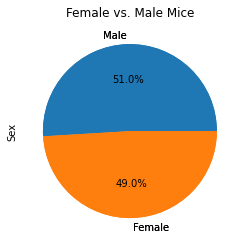

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data=clean_reset_df["Sex"].value_counts()
gender_data.plot.pie(autopct="%1.1f%%")
gender_data.plot(kind="pie", y="Timepoints", title="Female vs. Male Mice")
plt.show()

In [18]:
gender_data.head()

Male      958
Female    922
Name: Sex, dtype: int64

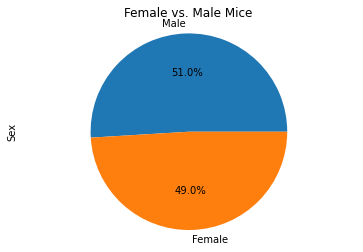

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=["Male", "Female"]
plt.pie(gender_data, labels=labels, autopct ="%1.1f%%")
plt.title("Female vs. Male Mice")
plt.axis("equal")
plt.ylabel("Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [20]:
clean_reset_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df=clean_reset_df.loc[clean_reset_df["Drug Regimen"]=="Capomulin",:]
Ramicane_df=clean_reset_df.loc[clean_reset_df["Drug Regimen"]=="Ramicane",:]
Infubinol_df=clean_reset_df.loc[clean_reset_df["Drug Regimen"]=="Infubinol",:]
Ceftamin_df=clean_reset_df.loc[clean_reset_df["Drug Regimen"]=="Ceftamin",:]

four_treatments=[Capomulin_df,Ramicane_df,Infubinol_df,Ceftamin_df]
four_treatments_df=pd.concat(four_treatments)
four_treatments_df



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
1838,y865,Ceftamin,Male,23,26,25,57.173538,2
1839,y865,Ceftamin,Male,23,26,30,59.033275,3
1840,y865,Ceftamin,Male,23,26,35,61.153140,3
1841,y865,Ceftamin,Male,23,26,40,63.469549,3


In [22]:
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint=four_treatments_df.groupby(['Mouse ID'])["Timepoint"].max()
last_timepoint_df=pd.DataFrame(last_timepoint)
last_timepoint_df


,Timepoint
Mouse ID,
a203,45
a251,45
a275,45
a411,45
a444,45
...,...
y769,45
y793,45
y865,45


In [23]:

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_last_tp=pd.merge(last_timepoint_df,clean_reset_df, on=("Mouse ID", "Timepoint"),how="left")

merge_last_tp

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [24]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatments:
    volume=merge_last_tp.loc[merge_last_tp["Drug Regimen"]==drug]["Tumor Volume (mm3)"]
     
    # add subset 
    tumor_vol.append(volume)
    #print(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles=volume.quantile([0.25,0.5,0.75])
    lowerq=quartiles[0.25]
    upperq=quartiles[0.75]
    iqr=upperq-lowerq
    lower_bound= lowerq-(1.5*iqr)
    upper_bound= upperq+(1.5*iqr)
    outliers= volume.loc[(volume>upper_bound) | (volume<lower_bound)]
  
    
    print(f"The lower quartile of tumor volume(mm3)for {drug} is: {round(lowerq,2)}")
    print(f"The upper quartile of tumor volume(mm3)for {drug} is: {round(upperq,2)}")
    print(f"The interquartile of tumor volume(mm3)for {drug} is: {round(iqr,2)}")
    print(f"The the median of tumor volume(mm3)for {drug} is: {round(quartiles[0.5],2)} ")
    print(f"Values below {round(lower_bound,2)} could be outliers.")
    print(f"Values above {round(upper_bound,2)} could be outliers.")
    if outliers.count()>0:
        for i in outliers.index:
          print(f"The outliers for {drug} are/is {round(outliers[i],2)}.")
    print('---------------------------------------------------------------------')
    

The lower quartile of tumor volume(mm3)for Capomulin is: 32.38
The upper quartile of tumor volume(mm3)for Capomulin is: 40.16
The interquartile of tumor volume(mm3)for Capomulin is: 7.78
The the median of tumor volume(mm3)for Capomulin is: 38.13 
Values below 20.7 could be outliers.
Values above 51.83 could be outliers.
---------------------------------------------------------------------
The lower quartile of tumor volume(mm3)for Ramicane is: 31.56
The upper quartile of tumor volume(mm3)for Ramicane is: 40.66
The interquartile of tumor volume(mm3)for Ramicane is: 9.1
The the median of tumor volume(mm3)for Ramicane is: 36.56 
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.
---------------------------------------------------------------------
The lower quartile of tumor volume(mm3)for Infubinol is: 54.05
The upper quartile of tumor volume(mm3)for Infubinol is: 65.53
The interquartile of tumor volume(mm3)for Infubinol is: 11.48
The the median of tumor volume(m

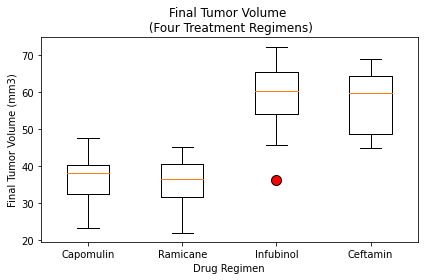

In [25]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1,final_tumor_plot=plt.subplots()
final_tumor_plot.boxplot(tumor_vol, labels=treatments,flierprops={'markerfacecolor':'r','markersize': 10})
final_tumor_plot.set_title("Final Tumor Volume \n (Four Treatment Regimens)")
final_tumor_plot.set_xlabel("Drug Regimen")
final_tumor_plot.set_ylabel("Final Tumor Volume (mm3)")
plt.tight_layout()
plt.show()

## Line and Scatter Plots

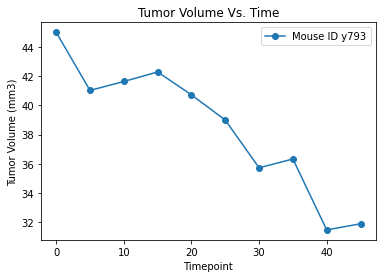

In [26]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomuli

mouse_data=Capomulin_df.loc[Capomulin_df["Mouse ID"]=="y793"]
x=mouse_data["Timepoint"]
y=mouse_data["Tumor Volume (mm3)"]
plt.plot(x, y, label="Mouse ID y793", marker="o")
plt.legend(loc="best")
plt.title("Tumor Volume Vs. Time")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

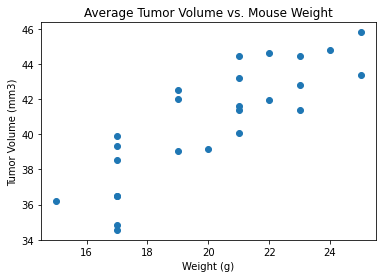

In [27]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_groupby=Capomulin_df.groupby("Mouse ID").mean()
x=Capomulin_groupby["Weight (g)"]
y=Capomulin_groupby["Tumor Volume (mm3)"]
plt.scatter(x, y, marker="o")
plt.title("Average Tumor Volume vs. Mouse Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

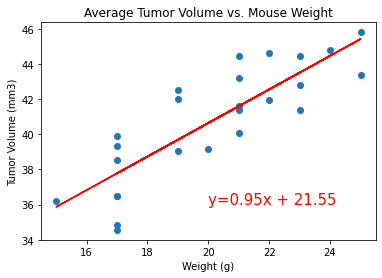

The correlation coefficient between mouse weight and tumor volume is 0.84.


In [28]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x=Capomulin_groupby["Weight (g)"]
y=Capomulin_groupby["Tumor Volume (mm3)"]
correlation=round(st.pearsonr(x,y)[0],2)
(slope, intercept, rvalue, pvalue, stderr)= st.linregress(x,y)
regress_values=x * slope + intercept
line_eq="y=" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y, marker="o")
plt.title("Average Tumor Volume vs. Mouse Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq, (20,36), fontsize=15, color="red")
plt.show()
print(f"The correlation coefficient between mouse weight and tumor volume is {correlation}.")